In [29]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.interpolate import LinearNDInterpolator
from scipy.ndimage import gaussian_filter

In [30]:
dx = 0.025
xx,zz = np.meshgrid(np.arange(0,1+dx,dx),np.arange(0,1+dx,dx))

data = np.loadtxt('cavityNonNewtonian_n2_k0_01_0.csv',delimiter = ',')
u_data = data[:,1] 
v_data = data[:,2]
p_data = data[:,0]
Xu = data[:,4]
Zu = data[:,5]



u_interp = LinearNDInterpolator(list(zip(Xu,Zu)), u_data)
v_interp = LinearNDInterpolator(list(zip(Xu,Zu)), v_data)
p_interp = LinearNDInterpolator(list(zip(Xu,Zu)), p_data)

u_test = u_interp(xx,zz)
v_test = v_interp(xx,zz)
p_test = p_interp(xx,zz)
epsilon = 0.1
noise =  epsilon*gaussian_filter(np.random.randn(xx.shape[0],xx.shape[1]),sigma=2)

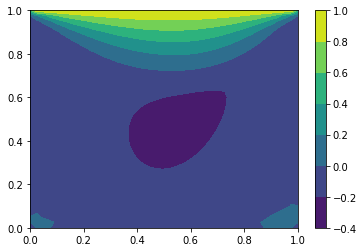

In [31]:
plt.contourf(xx,zz,u_test)
plt.colorbar()

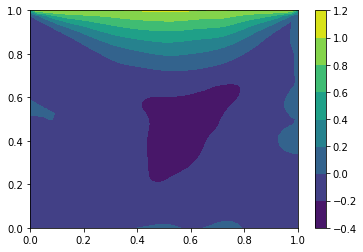

In [32]:
plt.contourf(xx,zz,u_test+noise)
plt.colorbar()